<a href="https://www.kaggle.com/code/weeshal/customer-shopping-data?scriptVersionId=125550634" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Data Analysis with Python using customer-shopping-dataset**

# Loading Data


In [1]:
import pandas as pd 
df=pd.read_csv("/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv")

# Understanding Dataset

first five rows 


In [2]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


last five rows

In [3]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


# Data Prepocessing

checking the content

In [4]:
df.shape
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


total number of columns 

In [5]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

Let's replace the space in the column names with an underscore.

In [6]:
df.columns = df.columns.str.replace(" ","_")

finding type of data 

In [7]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

finding missing null values

In [8]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

finding all the column inforomation 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


finding different age group present

In [10]:
print(len(df["age"].unique()))
df["age"].unique()

52


array([28, 21, 20, 66, 53, 49, 32, 69, 60, 36, 29, 67, 25, 24, 65, 42, 46,
       23, 27, 52, 44, 51, 50, 68, 43, 59, 54, 48, 40, 41, 19, 18, 22, 61,
       45, 64, 33, 63, 34, 47, 38, 57, 30, 26, 62, 39, 55, 56, 35, 31, 37,
       58])

finding first five invoice date

In [11]:
df["invoice_date"].head()

0      5/8/2022
1    12/12/2021
2     9/11/2021
3    16/05/2021
4    24/10/2021
Name: invoice_date, dtype: object

# Data cleaning

changing invoice_date datatype to datetime

In [12]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

seperating month and year

In [13]:
df['year'] = df["invoice_date"].dt.year
df['month'] = df["invoice_date"].dt.month

In [14]:
df["year"].describe

<bound method NDFrame.describe of 0        2022
1        2021
2        2021
3        2021
4        2021
         ... 
99452    2022
99453    2021
99454    2021
99455    2021
99456    2022
Name: year, Length: 99457, dtype: int64>

updated data set

In [15]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-05-08,Kanyon,2022,5
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-09-11,Metrocity,2021,9
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


In [16]:
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
year                       int64
month                      int64
dtype: object

gender count

In [17]:
df["gender"].describe()

count      99457
unique         2
top       Female
freq       59482
Name: gender, dtype: object

finding duplicate values

In [18]:
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
99452    False
99453    False
99454    False
99455    False
99456    False
Length: 99457, dtype: bool


# Data Visualisation

In [19]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


<AxesSubplot:>

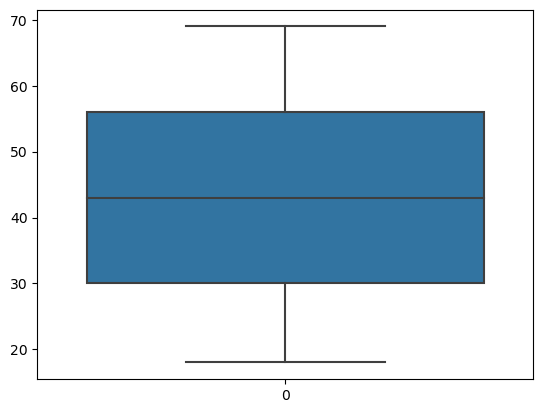

In [20]:
sns.boxplot(df['age'])

So, average customer age is between 30-55 years 

Text(0.5, 1.0, 'The number of categories')

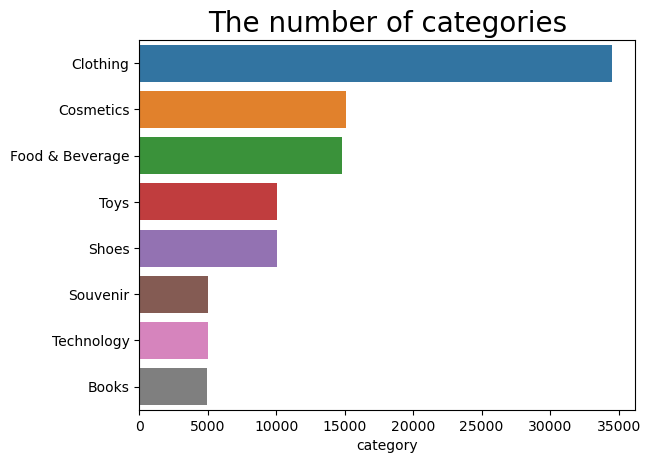

In [21]:
cat_num = df["category"].value_counts()
sns.barplot(x = cat_num, y = cat_num.index, data = df)
plt.title("The number of categories", size=20)


There are total 8 categories of products and maximum sales by quantity is clothes .

Text(0.5, 1.0, 'male vs female')

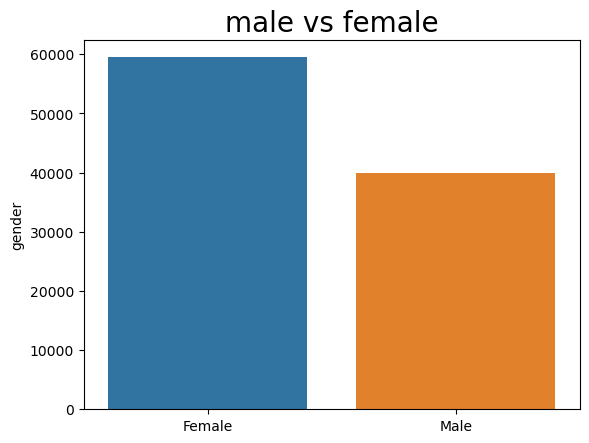

In [22]:
gen_num=df["gender"].value_counts()
sns.barplot(y = gen_num, x = gen_num.index, data = df)
plt.title("male vs female", size=20)


Majority of customers are female 

Text(0.5, 1.0, 'Category & Price')

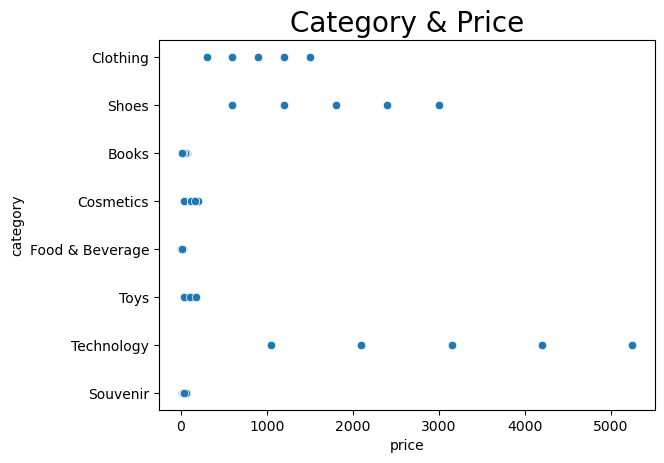

In [23]:
sns.scatterplot(data = df, y = "category", x = "price")
plt.title("Category & Price", size=20)

maximum sales by price is technology 

Text(0.5, 1.0, 'payments method ')

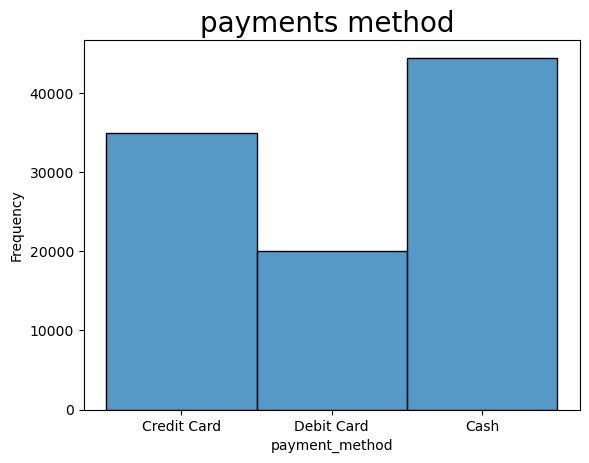

In [24]:
sns.histplot(df["payment_method"], kde = False,stat='frequency')
plt.title("payments method ", size=20,)

Cash is the most prefferd mode of transaction followed 

Text(0.5, 1.0, 'Sales per month ')

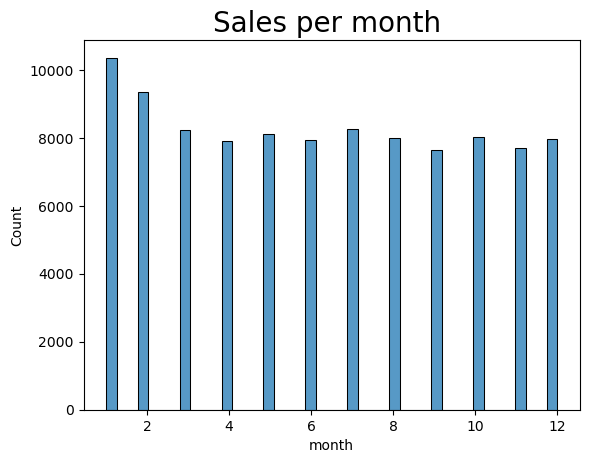

In [25]:
sns.histplot(df["month"], kde = False)
plt.title("Sales per month ", size=20,)

Sales was maximum during the month of january 